In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
import keras
import keras.backend as k
from keras.layers import Activation, Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import binary_crossentropy
from keras.models import Sequential

In [4]:
data = pd.read_csv('breast_cancer.csv')
data.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [5]:
data = data.drop(['id'], axis='columns')
data.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [6]:
data.isnull().values.any()

False

Text(0.5, 1.0, 'count plot')

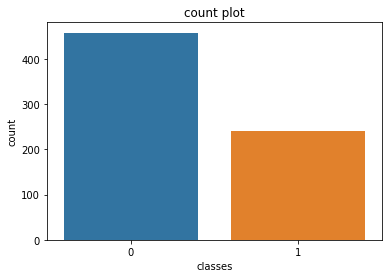

In [7]:
sns.set_style()
sns.countplot(x='classes', data=data)
plt.xlabel('classes')
plt.ylabel('count')
plt.title('count plot')

Text(0.5, 1, 'correlation matrix')

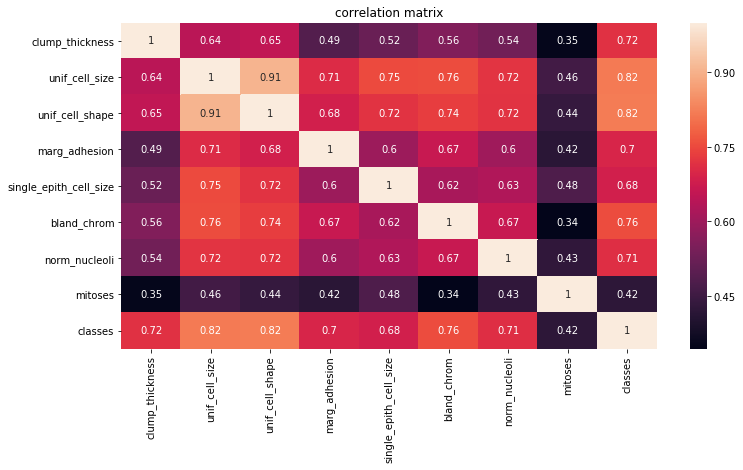

In [8]:
cormat = data.corr()
top_index = cormat.index
plt.figure(figsize=(12,6))
sns.heatmap(data[top_index].corr(), annot=True)
plt.title('correlation matrix')


In [9]:
data = data.drop(['marg_adhesion', 'mitoses'], axis='columns')
data.head()

,clump_thickness,unif_cell_size,unif_cell_shape,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,classes
0,5,1,1,2,1,3,1,0
1,5,4,4,7,10,3,2,0
2,3,1,1,2,2,3,1,0
3,6,8,8,3,4,3,7,0
4,4,1,1,2,1,3,1,0


In [29]:
data = data.drop(['bare_nuclei'], axis='columns')
data.head()

,clump_thickness,unif_cell_size,unif_cell_shape,single_epith_cell_size,bland_chrom,norm_nucleoli,classes
0,5,1,1,2,3,1,0
1,5,4,4,7,3,2,0
2,3,1,1,2,3,1,0
3,6,8,8,3,3,7,0
4,4,1,1,2,3,1,0


In [28]:
type(data.bare_nuclei)

pandas.core.series.Series

In [31]:
features = data.iloc[:,0:6].values
target = data.iloc[:,6].values

In [33]:
target

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [35]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [36]:
model = Sequential()
model.add(Dense(15, input_dim=6, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(x_train, y_train, shuffle=True, epochs=1000, validation_split=0.2, verbose=2)

Train on 419 samples, validate on 105 samples
Epoch 1/1000
 - 1s - loss: 0.7668 - accuracy: 0.3580 - val_loss: 0.7805 - val_accuracy: 0.3143
Epoch 2/1000
 - 0s - loss: 0.7322 - accuracy: 0.3437 - val_loss: 0.7634 - val_accuracy: 0.3143
Epoch 3/1000
 - 0s - loss: 0.7283 - accuracy: 0.3508 - val_loss: 0.7482 - val_accuracy: 0.3143
Epoch 4/1000
 - 0s - loss: 0.7224 - accuracy: 0.3389 - val_loss: 0.7340 - val_accuracy: 0.3143
Epoch 5/1000
 - 0s - loss: 0.7057 - accuracy: 0.3508 - val_loss: 0.7222 - val_accuracy: 0.3143
Epoch 6/1000
 - 0s - loss: 0.6894 - accuracy: 0.3604 - val_loss: 0.7116 - val_accuracy: 0.3143
Epoch 7/1000
 - 0s - loss: 0.6816 - accuracy: 0.3508 - val_loss: 0.7028 - val_accuracy: 0.3143
Epoch 8/1000
 - 0s - loss: 0.6717 - accuracy: 0.3604 - val_loss: 0.6954 - val_accuracy: 0.3143
Epoch 9/1000
 - 0s - loss: 0.6702 - accuracy: 0.3508 - val_loss: 0.6879 - val_accuracy: 0.3143
Epoch 10/1000
 - 0s - loss: 0.6686 - accuracy: 0.3580 - val_loss: 0.6808 - val_accuracy: 0.3143
Epo

Epoch 86/1000
 - 0s - loss: 0.5388 - accuracy: 0.8401 - val_loss: 0.5795 - val_accuracy: 0.8571
Epoch 87/1000
 - 0s - loss: 0.5446 - accuracy: 0.8353 - val_loss: 0.5788 - val_accuracy: 0.8571
Epoch 88/1000
 - 0s - loss: 0.5383 - accuracy: 0.8401 - val_loss: 0.5780 - val_accuracy: 0.8571
Epoch 89/1000
 - 0s - loss: 0.5431 - accuracy: 0.8258 - val_loss: 0.5774 - val_accuracy: 0.8476
Epoch 90/1000
 - 0s - loss: 0.5446 - accuracy: 0.8329 - val_loss: 0.5768 - val_accuracy: 0.8476
Epoch 91/1000
 - 0s - loss: 0.5444 - accuracy: 0.8353 - val_loss: 0.5763 - val_accuracy: 0.8476
Epoch 92/1000
 - 0s - loss: 0.5390 - accuracy: 0.8425 - val_loss: 0.5757 - val_accuracy: 0.8476
Epoch 93/1000
 - 0s - loss: 0.5388 - accuracy: 0.8401 - val_loss: 0.5752 - val_accuracy: 0.8476
Epoch 94/1000
 - 0s - loss: 0.5402 - accuracy: 0.8377 - val_loss: 0.5747 - val_accuracy: 0.8476
Epoch 95/1000
 - 0s - loss: 0.5412 - accuracy: 0.8449 - val_loss: 0.5743 - val_accuracy: 0.8476
Epoch 96/1000
 - 0s - loss: 0.5366 - acc

Epoch 171/1000
 - 0s - loss: 0.4933 - accuracy: 0.8831 - val_loss: 0.5333 - val_accuracy: 0.8857
Epoch 172/1000
 - 0s - loss: 0.4942 - accuracy: 0.8902 - val_loss: 0.5328 - val_accuracy: 0.8857
Epoch 173/1000
 - 0s - loss: 0.4897 - accuracy: 0.8878 - val_loss: 0.5323 - val_accuracy: 0.8952
Epoch 174/1000
 - 0s - loss: 0.4957 - accuracy: 0.8926 - val_loss: 0.5319 - val_accuracy: 0.8952
Epoch 175/1000
 - 0s - loss: 0.4970 - accuracy: 0.8759 - val_loss: 0.5314 - val_accuracy: 0.8952
Epoch 176/1000
 - 0s - loss: 0.4937 - accuracy: 0.8902 - val_loss: 0.5309 - val_accuracy: 0.8952
Epoch 177/1000
 - 0s - loss: 0.4860 - accuracy: 0.8783 - val_loss: 0.5305 - val_accuracy: 0.8952
Epoch 178/1000
 - 0s - loss: 0.4897 - accuracy: 0.8878 - val_loss: 0.5300 - val_accuracy: 0.8952
Epoch 179/1000
 - 0s - loss: 0.4906 - accuracy: 0.8854 - val_loss: 0.5295 - val_accuracy: 0.8952
Epoch 180/1000
 - 0s - loss: 0.4925 - accuracy: 0.8926 - val_loss: 0.5289 - val_accuracy: 0.8952
Epoch 181/1000
 - 0s - loss: 0

Epoch 256/1000
 - 0s - loss: 0.4093 - accuracy: 0.9212 - val_loss: 0.4545 - val_accuracy: 0.9333
Epoch 257/1000
 - 0s - loss: 0.4091 - accuracy: 0.9260 - val_loss: 0.4535 - val_accuracy: 0.9333
Epoch 258/1000
 - 0s - loss: 0.4056 - accuracy: 0.9260 - val_loss: 0.4525 - val_accuracy: 0.9333
Epoch 259/1000
 - 0s - loss: 0.4046 - accuracy: 0.9284 - val_loss: 0.4514 - val_accuracy: 0.9333
Epoch 260/1000
 - 0s - loss: 0.3967 - accuracy: 0.9236 - val_loss: 0.4510 - val_accuracy: 0.9333
Epoch 261/1000
 - 0s - loss: 0.3903 - accuracy: 0.9284 - val_loss: 0.4504 - val_accuracy: 0.9333
Epoch 262/1000
 - 0s - loss: 0.3995 - accuracy: 0.9260 - val_loss: 0.4490 - val_accuracy: 0.9333
Epoch 263/1000
 - 0s - loss: 0.4094 - accuracy: 0.9212 - val_loss: 0.4479 - val_accuracy: 0.9333
Epoch 264/1000
 - 0s - loss: 0.4090 - accuracy: 0.9165 - val_loss: 0.4473 - val_accuracy: 0.9333
Epoch 265/1000
 - 0s - loss: 0.4068 - accuracy: 0.9141 - val_loss: 0.4456 - val_accuracy: 0.9238
Epoch 266/1000
 - 0s - loss: 0

Epoch 341/1000
 - 0s - loss: 0.3195 - accuracy: 0.9260 - val_loss: 0.3827 - val_accuracy: 0.9238
Epoch 342/1000
 - 0s - loss: 0.3169 - accuracy: 0.9284 - val_loss: 0.3812 - val_accuracy: 0.9238
Epoch 343/1000
 - 0s - loss: 0.3122 - accuracy: 0.9332 - val_loss: 0.3817 - val_accuracy: 0.9238
Epoch 344/1000
 - 0s - loss: 0.3239 - accuracy: 0.9332 - val_loss: 0.3818 - val_accuracy: 0.9238
Epoch 345/1000
 - 0s - loss: 0.3048 - accuracy: 0.9284 - val_loss: 0.3809 - val_accuracy: 0.9238
Epoch 346/1000
 - 0s - loss: 0.3307 - accuracy: 0.9260 - val_loss: 0.3806 - val_accuracy: 0.9238
Epoch 347/1000
 - 0s - loss: 0.3125 - accuracy: 0.9332 - val_loss: 0.3802 - val_accuracy: 0.9238
Epoch 348/1000
 - 0s - loss: 0.3105 - accuracy: 0.9236 - val_loss: 0.3792 - val_accuracy: 0.9238
Epoch 349/1000
 - 0s - loss: 0.3043 - accuracy: 0.9356 - val_loss: 0.3774 - val_accuracy: 0.9238
Epoch 350/1000
 - 0s - loss: 0.3063 - accuracy: 0.9212 - val_loss: 0.3765 - val_accuracy: 0.9238
Epoch 351/1000
 - 0s - loss: 0

Epoch 426/1000
 - 0s - loss: 0.2605 - accuracy: 0.9499 - val_loss: 0.3346 - val_accuracy: 0.9238
Epoch 427/1000
 - 0s - loss: 0.2658 - accuracy: 0.9403 - val_loss: 0.3344 - val_accuracy: 0.9238
Epoch 428/1000
 - 0s - loss: 0.2764 - accuracy: 0.9260 - val_loss: 0.3340 - val_accuracy: 0.9238
Epoch 429/1000
 - 0s - loss: 0.2517 - accuracy: 0.9403 - val_loss: 0.3336 - val_accuracy: 0.9238
Epoch 430/1000
 - 0s - loss: 0.2706 - accuracy: 0.9284 - val_loss: 0.3340 - val_accuracy: 0.9238
Epoch 431/1000
 - 0s - loss: 0.2898 - accuracy: 0.9212 - val_loss: 0.3353 - val_accuracy: 0.9238
Epoch 432/1000
 - 0s - loss: 0.2752 - accuracy: 0.9308 - val_loss: 0.3338 - val_accuracy: 0.9238
Epoch 433/1000
 - 0s - loss: 0.2665 - accuracy: 0.9403 - val_loss: 0.3326 - val_accuracy: 0.9238
Epoch 434/1000
 - 0s - loss: 0.2477 - accuracy: 0.9499 - val_loss: 0.3317 - val_accuracy: 0.9238
Epoch 435/1000
 - 0s - loss: 0.2585 - accuracy: 0.9379 - val_loss: 0.3312 - val_accuracy: 0.9238
Epoch 436/1000
 - 0s - loss: 0

Epoch 511/1000
 - 0s - loss: 0.2195 - accuracy: 0.9475 - val_loss: 0.3040 - val_accuracy: 0.9238
Epoch 512/1000
 - 0s - loss: 0.2315 - accuracy: 0.9379 - val_loss: 0.3049 - val_accuracy: 0.9238
Epoch 513/1000
 - 0s - loss: 0.2242 - accuracy: 0.9475 - val_loss: 0.3060 - val_accuracy: 0.9238
Epoch 514/1000
 - 0s - loss: 0.2196 - accuracy: 0.9547 - val_loss: 0.3049 - val_accuracy: 0.9238
Epoch 515/1000
 - 0s - loss: 0.2173 - accuracy: 0.9451 - val_loss: 0.3035 - val_accuracy: 0.9238
Epoch 516/1000
 - 0s - loss: 0.2148 - accuracy: 0.9451 - val_loss: 0.3026 - val_accuracy: 0.9238
Epoch 517/1000
 - 0s - loss: 0.2181 - accuracy: 0.9427 - val_loss: 0.3021 - val_accuracy: 0.9238
Epoch 518/1000
 - 0s - loss: 0.2251 - accuracy: 0.9451 - val_loss: 0.3022 - val_accuracy: 0.9238
Epoch 519/1000
 - 0s - loss: 0.2220 - accuracy: 0.9356 - val_loss: 0.3018 - val_accuracy: 0.9238
Epoch 520/1000
 - 0s - loss: 0.2297 - accuracy: 0.9379 - val_loss: 0.3014 - val_accuracy: 0.9238
Epoch 521/1000
 - 0s - loss: 0

Epoch 596/1000
 - 0s - loss: 0.1988 - accuracy: 0.9403 - val_loss: 0.2806 - val_accuracy: 0.9238
Epoch 597/1000
 - 0s - loss: 0.1852 - accuracy: 0.9499 - val_loss: 0.2809 - val_accuracy: 0.9238
Epoch 598/1000
 - 0s - loss: 0.1941 - accuracy: 0.9570 - val_loss: 0.2799 - val_accuracy: 0.9238
Epoch 599/1000
 - 0s - loss: 0.1891 - accuracy: 0.9618 - val_loss: 0.2794 - val_accuracy: 0.9238
Epoch 600/1000
 - 0s - loss: 0.2116 - accuracy: 0.9475 - val_loss: 0.2786 - val_accuracy: 0.9238
Epoch 601/1000
 - 0s - loss: 0.1799 - accuracy: 0.9547 - val_loss: 0.2780 - val_accuracy: 0.9238
Epoch 602/1000
 - 0s - loss: 0.1977 - accuracy: 0.9523 - val_loss: 0.2776 - val_accuracy: 0.9238
Epoch 603/1000
 - 0s - loss: 0.1814 - accuracy: 0.9523 - val_loss: 0.2772 - val_accuracy: 0.9238
Epoch 604/1000
 - 0s - loss: 0.2114 - accuracy: 0.9379 - val_loss: 0.2774 - val_accuracy: 0.9238
Epoch 605/1000
 - 0s - loss: 0.2125 - accuracy: 0.9475 - val_loss: 0.2773 - val_accuracy: 0.9238
Epoch 606/1000
 - 0s - loss: 0

Epoch 681/1000
 - 0s - loss: 0.1770 - accuracy: 0.9618 - val_loss: 0.2532 - val_accuracy: 0.9333
Epoch 682/1000
 - 0s - loss: 0.1802 - accuracy: 0.9666 - val_loss: 0.2531 - val_accuracy: 0.9333
Epoch 683/1000
 - 0s - loss: 0.1795 - accuracy: 0.9547 - val_loss: 0.2539 - val_accuracy: 0.9333
Epoch 684/1000
 - 0s - loss: 0.1795 - accuracy: 0.9618 - val_loss: 0.2533 - val_accuracy: 0.9333
Epoch 685/1000
 - 0s - loss: 0.1732 - accuracy: 0.9570 - val_loss: 0.2533 - val_accuracy: 0.9429
Epoch 686/1000
 - 0s - loss: 0.1607 - accuracy: 0.9666 - val_loss: 0.2522 - val_accuracy: 0.9333
Epoch 687/1000
 - 0s - loss: 0.1917 - accuracy: 0.9427 - val_loss: 0.2515 - val_accuracy: 0.9333
Epoch 688/1000
 - 0s - loss: 0.1791 - accuracy: 0.9618 - val_loss: 0.2513 - val_accuracy: 0.9333
Epoch 689/1000
 - 0s - loss: 0.1667 - accuracy: 0.9594 - val_loss: 0.2515 - val_accuracy: 0.9429
Epoch 690/1000
 - 0s - loss: 0.1855 - accuracy: 0.9594 - val_loss: 0.2515 - val_accuracy: 0.9429
Epoch 691/1000
 - 0s - loss: 0

Epoch 766/1000
 - 0s - loss: 0.1558 - accuracy: 0.9690 - val_loss: 0.2331 - val_accuracy: 0.9524
Epoch 767/1000
 - 0s - loss: 0.1741 - accuracy: 0.9523 - val_loss: 0.2324 - val_accuracy: 0.9524
Epoch 768/1000
 - 0s - loss: 0.1554 - accuracy: 0.9594 - val_loss: 0.2325 - val_accuracy: 0.9524
Epoch 769/1000
 - 0s - loss: 0.1661 - accuracy: 0.9523 - val_loss: 0.2325 - val_accuracy: 0.9524
Epoch 770/1000
 - 0s - loss: 0.1570 - accuracy: 0.9642 - val_loss: 0.2335 - val_accuracy: 0.9429
Epoch 771/1000
 - 0s - loss: 0.1587 - accuracy: 0.9642 - val_loss: 0.2336 - val_accuracy: 0.9429
Epoch 772/1000
 - 0s - loss: 0.1581 - accuracy: 0.9618 - val_loss: 0.2328 - val_accuracy: 0.9429
Epoch 773/1000
 - 0s - loss: 0.1611 - accuracy: 0.9570 - val_loss: 0.2329 - val_accuracy: 0.9429
Epoch 774/1000
 - 0s - loss: 0.1691 - accuracy: 0.9594 - val_loss: 0.2326 - val_accuracy: 0.9429
Epoch 775/1000
 - 0s - loss: 0.1563 - accuracy: 0.9570 - val_loss: 0.2320 - val_accuracy: 0.9524
Epoch 776/1000
 - 0s - loss: 0

Epoch 851/1000
 - 0s - loss: 0.1313 - accuracy: 0.9642 - val_loss: 0.2134 - val_accuracy: 0.9524
Epoch 852/1000
 - 0s - loss: 0.1407 - accuracy: 0.9570 - val_loss: 0.2133 - val_accuracy: 0.9524
Epoch 853/1000
 - 0s - loss: 0.1511 - accuracy: 0.9618 - val_loss: 0.2132 - val_accuracy: 0.9524
Epoch 854/1000
 - 0s - loss: 0.1347 - accuracy: 0.9714 - val_loss: 0.2140 - val_accuracy: 0.9524
Epoch 855/1000
 - 0s - loss: 0.1413 - accuracy: 0.9642 - val_loss: 0.2140 - val_accuracy: 0.9524
Epoch 856/1000
 - 0s - loss: 0.1438 - accuracy: 0.9666 - val_loss: 0.2135 - val_accuracy: 0.9524
Epoch 857/1000
 - 0s - loss: 0.1617 - accuracy: 0.9570 - val_loss: 0.2131 - val_accuracy: 0.9524
Epoch 858/1000
 - 0s - loss: 0.1514 - accuracy: 0.9547 - val_loss: 0.2132 - val_accuracy: 0.9524
Epoch 859/1000
 - 0s - loss: 0.1460 - accuracy: 0.9618 - val_loss: 0.2131 - val_accuracy: 0.9524
Epoch 860/1000
 - 0s - loss: 0.1568 - accuracy: 0.9666 - val_loss: 0.2128 - val_accuracy: 0.9524
Epoch 861/1000
 - 0s - loss: 0

Epoch 936/1000
 - 0s - loss: 0.1353 - accuracy: 0.9690 - val_loss: 0.2056 - val_accuracy: 0.9524
Epoch 937/1000
 - 0s - loss: 0.1558 - accuracy: 0.9666 - val_loss: 0.2058 - val_accuracy: 0.9524
Epoch 938/1000
 - 0s - loss: 0.1359 - accuracy: 0.9570 - val_loss: 0.2057 - val_accuracy: 0.9524
Epoch 939/1000
 - 0s - loss: 0.1239 - accuracy: 0.9594 - val_loss: 0.2057 - val_accuracy: 0.9524
Epoch 940/1000
 - 0s - loss: 0.1344 - accuracy: 0.9690 - val_loss: 0.2052 - val_accuracy: 0.9524
Epoch 941/1000
 - 0s - loss: 0.1433 - accuracy: 0.9642 - val_loss: 0.2055 - val_accuracy: 0.9524
Epoch 942/1000
 - 0s - loss: 0.1394 - accuracy: 0.9737 - val_loss: 0.2053 - val_accuracy: 0.9524
Epoch 943/1000
 - 0s - loss: 0.1199 - accuracy: 0.9737 - val_loss: 0.2055 - val_accuracy: 0.9524
Epoch 944/1000
 - 0s - loss: 0.1389 - accuracy: 0.9594 - val_loss: 0.2052 - val_accuracy: 0.9524
Epoch 945/1000
 - 0s - loss: 0.1287 - accuracy: 0.9737 - val_loss: 0.2048 - val_accuracy: 0.9524
Epoch 946/1000
 - 0s - loss: 0

In [39]:
pred_cls = model.predict_classes(x_test, verbose=0)

In [40]:
accuracy_score(pred_cls, y_test)

0.9428571428571428

In [41]:
cm = confusion_matrix(pred_cls, y_test)
cm

array([[106,   4],
       [  6,  59]], dtype=int64)

Text(0.5, 1, 'confusion matrix')

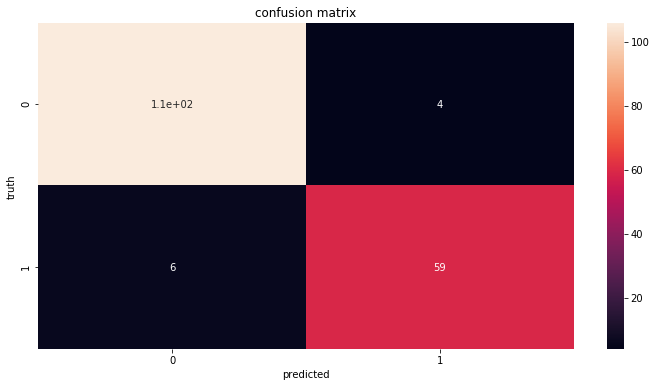

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.title('confusion matrix')

In [43]:
import joblib
joblib.dump(model, 'E://models//breast_cancer_nn')

['E://models//breast_cancer_nn']